###  In this notebook , model testing is automated in for-loops,
### This notebook is created for optimization of model testing procedure

In [36]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import linear_model

In [4]:
## Data loading procedure

In [5]:
X_2house = pd.read_csv('/wgdisk/ho0338/ek79/Tien/X_2house_v0.csv')
X_2house=X_2house.drop(columns=['Unnamed: 0'])
X_2house.index.rename('Order', inplace=True)

In [7]:
y_2house = np.load('Data/Processed/y_2house.npy')

In [8]:
## check on the data dimensions
print('X_input:',X_2house.shape)
print('y_input:',y_2house.shape)

X_input: (4290985, 158)
y_input: (4290985,)


In [9]:
## setup train-test split
from sklearn.model_selection import train_test_split, metrics
X_train, X_test, y_train, y_test = train_test_split(X_2house, y_2house, test_size=0.5, random_state=12)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2145492, 158)
(2145492,)
(2145493, 158)
(2145493,)


In [91]:
### setup model parameters
#mod_type = ['Lasso','Ridge']
mod_type = ['Lasso','Ridge']
fit_int, norm, copyX, max_itr, tolerance, solv, Precomp, pos, r_stat = False, False, True, None, 0.001, 'auto', False, False, 12
test_alph = [5.0,2.0,1.0,0.1]

In [92]:
# prepare the numpy array to store the model coefficients & intercepts
k = X_train.shape[1]
r_k = len(mod_type)*len(test_alph)
col_names =['model_type','alpha']
for i in range(k):
    str_name = 'coef_'+str(i+1)
    col_names=col_names+[str(str_name)]   
col_names = col_names+['intercept']

In [93]:
#  initiate a new dataframe , empty to append
df= pd.DataFrame(columns = col_names)
df.head()

,model_type,alpha,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,...,coef_150,coef_151,coef_152,coef_153,coef_154,coef_155,coef_156,coef_157,coef_158,intercept


class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)

In [94]:
from sklearn import metrics
for test_type in tqdm(mod_type):
    print('model type: ',test_type)
    for alph in test_alph:
        print('alpha is: ', alph)
        if test_type == 'Lasso': 
            model = linear_model.Lasso(alpha=alph, fit_intercept=fit_int, normalize=norm, precompute=Precomp, copy_X=copyX, max_iter=1000, random_state=r_stat, selection='cyclic')
        if test_type == 'Ridge': 
            model = linear_model.Ridge(alpha=alph, fit_intercept=fit_int, normalize=norm, copy_X= copyX, max_iter= max_itr, tol= tolerance, solver= solv, random_state=r_stat)
        model.fit(X_train,y_train)
        # save coefficients
        tmp_row=[test_type,alph]+list(model.coef_)+[model.intercept_]
        df.loc[len(df)]=tmp_row
        y_test_pred = model.predict(X_test)

        print('MSE score(testing):',metrics.mean_squared_error(y_test, y_test_pred))
        print('MAE score(testing):',metrics.mean_absolute_error(y_test, y_test_pred))



  0%|          | 0/2 [00:00<?, ?it/s]

model type:  Lasso
alpha is:  5.0


/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


MSE score(testing): 1723975376.9
MAE score(testing): 27632.5096329
alpha is:  2.0
MSE score(testing): 1723974337.36
MAE score(testing): 27637.2593482
alpha is:  1.0
MSE score(testing): 1723980238.59
MAE score(testing): 27638.9150854
alpha is:  0.1




 50%|█████     | 1/2 [33:47<33:47, 2027.44s/it]

MSE score(testing): 1723988682.34
MAE score(testing): 27640.5121801
model type:  Ridge
alpha is:  5.0
MSE score(testing): 1702334474.37
MAE score(testing): 27270.2582019
alpha is:  2.0
MSE score(testing): 1702334611.15
MAE score(testing): 27270.271525
alpha is:  1.0
MSE score(testing): 1702334657.33
MAE score(testing): 27270.2759816
alpha is:  0.1


/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.123693e-17
  overwrite_a=True).T


100%|██████████| 2/2 [34:35<00:00, 1037.66s/it]



MSE score(testing): 1702334699.15
MAE score(testing): 27270.2800063


In [95]:
df

,model_type,alpha,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,...,coef_150,coef_151,coef_152,coef_153,coef_154,coef_155,coef_156,coef_157,coef_158,intercept
0,Lasso,5.0,-129.096329,-3381.508762,33.897681,0.378656,12006.857528,1773.737877,-427.939799,1435.067699,...,102.696685,-12385.630952,-153.353397,-8454.194363,12.033208,35.443705,9.383066,-476.490795,3387.200112,0.0
1,Lasso,2.0,-128.442279,-3370.127547,34.011989,0.378325,12846.062426,1829.010908,-427.384688,1454.280056,...,103.943539,-12542.367863,-154.308600,-8612.272278,12.047360,36.803899,9.275880,-476.185840,3389.340575,0.0
2,Lasso,1.0,-128.226871,-3366.289761,34.050367,0.378213,13126.531123,1847.422765,-427.182280,1460.753826,...,104.358752,-12594.579629,-154.631947,-8664.919261,12.052074,37.256330,9.240041,-476.072162,3390.076541,0.0
3,Lasso,0.1,-128.046352,-3362.490533,34.085953,0.378104,13379.083225,1863.453787,-426.957372,1466.225885,...,104.731931,-12641.541551,-154.928740,-8712.260398,12.056325,37.661250,9.207685,-475.968669,3390.744467,0.0
4,Ridge,5.0,-118.618713,-2330.225184,33.053368,0.394281,9621.503720,658.781867,-287.663778,888.020142,...,102.744501,-11965.428639,-79.073643,-9479.273466,12.357206,48.205308,1525.800994,-524.394567,2805.037891,0.0
5,Ridge,2.0,-118.617652,-2330.248393,33.053049,0.394287,9624.148304,658.832849,-287.671902,888.006031,...,102.751623,-11966.321773,-79.093251,-9479.990300,12.357273,48.218413,1525.792194,-524.440171,2805.004337,0.0
6,Ridge,1.0,-118.617299,-2330.256137,33.052942,0.394289,9625.030009,658.849845,-287.674613,888.001318,...,102.753998,-11966.619541,-79.099796,-9480.229316,12.357296,48.222787,1525.789264,-524.455394,2804.993132,0.0
7,Ridge,0.1,-118.616981,-2330.263110,33.052847,0.394291,9625.823619,658.865143,-287.677054,887.997073,...,102.756135,-11966.887555,-79.105691,-9480.444460,12.357316,48.226725,1525.786623,-524.469105,2804.983039,0.0


In [76]:
# save the coefficients to a csv

In [96]:
df.to_csv('LR_models_param_saveout.csv')

In [131]:
# Compare prediction and the calculated y_predict from coeficients
def cal_pred(X_input,coefs,intcpt):
    """ X_input is a dataframe input with only attributes used in model fit """
    import numpy as np
    import pandas as pd
    from tqdm import tqdm
    nrows = len(X_input)
    b = np.array(coefs)
    y_pred = np.zeros(nrows)
    for i in tqdm(range(nrows)):
        x=np.array(X_input.iloc[i])
        y_pred[i]=intcpt+np.multiply(x,b).sum()
    return y_pred    

In [132]:
cal_y_pred = cal_pred(X_test,model.coef_,model.intercept_)

In [133]:
print(cal_y_pred.shape)
print(y_test_pred.shape)

(2145493,)
(2145493,)


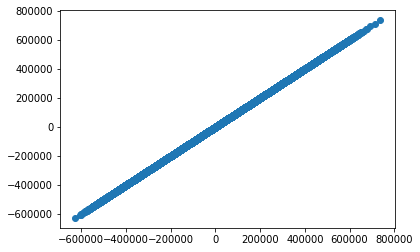

In [136]:
import matplotlib.pyplot as plt
plt.scatter(cal_y_pred,y_test_pred)
plt.show()